In [2]:
import os
import tempfile

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from pulgin.modelLearn import *
from pulgin.movenetPoseMark import MoveNetPoseMark
from pulgin.movenetClassifier import MoveNetClassifier

In [3]:
with open(f'./data/labels.txt', 'r') as label_file:
  class_names = list(label_file)

poseMark = MoveNetPoseMark(model_path="./model/movenet_singlepose_thunder_fp16")

# Training部分

In [4]:
images_ROOT = "./data/run_data/"
train_folder = os.path.join(images_ROOT, 'train')
test_folder = os.path.join(images_ROOT, 'test')
images_Temp = tempfile.mkdtemp()
csvs_train_path = images_Temp + "/train_data.csv"
csvs_test_path = images_Temp + "/test_data.csv"

In [5]:
_, train_pose = poseMark.process(folder=train_folder, csvs_path=csvs_train_path)
_, test_pose = poseMark.process(folder=test_folder, csvs_path=csvs_test_path)

Preprocessing ForrestGump
100%|██████████| 79/79 [00:05<00:00, 13.26it/s]
Preprocessing ForwardRun
100%|██████████| 109/109 [00:08<00:00, 13.27it/s]
Preprocessing GirlRun
100%|██████████| 89/89 [00:06<00:00, 13.33it/s]
Preprocessing Naruto
100%|██████████| 158/158 [00:11<00:00, 13.57it/s]
Preprocessing NormalRun
100%|██████████| 180/180 [00:13<00:00, 13.30it/s]
Preprocessing ShoulderRun
100%|██████████| 91/91 [00:06<00:00, 13.28it/s]
Preprocessing SitWithRun
100%|██████████| 145/145 [00:10<00:00, 13.45it/s]
Preprocessing UnswingingArm
100%|██████████| 145/145 [00:10<00:00, 13.27it/s]
Preprocessing ForrestGump
100%|██████████| 23/23 [00:01<00:00, 13.16it/s]
Preprocessing ForwardRun
100%|██████████| 31/31 [00:02<00:00, 13.43it/s]
Preprocessing GirlRun
100%|██████████| 26/26 [00:01<00:00, 13.56it/s]
Preprocessing Naruto
100%|██████████| 45/45 [00:03<00:00, 13.52it/s]
Preprocessing NormalRun
100%|██████████| 52/52 [00:03<00:00, 13.35it/s]
Preprocessing ShoulderRun
100%|██████████| 25/25 [0

In [15]:
# _, X, y = load_pose_landmarks(csvs_out_train_path)
# _, X_test, y_test = load_pose_landmarks(csvs_out_test_path)

In [6]:
_, X, y = split_pose_landmarks(train_pose)
_, X_test, y_test = split_pose_landmarks(test_pose)

In [7]:
classifier = MoveNetClassifier()
classifier.build_model(class_names=class_names)
history = classifier.train(X, y, cp_path="./model/weights.best.hdf5", save_path="./model/run_classifier/")
loss, accuracy = classifier.evaluate(X_test, y_test)
y_pred = classifier.predict(X_test)

Epoch 1/200
26/40 [==================>...........] - ETA: 0s - loss: 2.0698 - accuracy: 0.1442     
Epoch 1: val_accuracy improved from -inf to 0.19643, saving model to ./model\weights.best.hdf5
40/40 [==============================] - 1s 10ms/step - loss: 2.0703 - accuracy: 0.1521 - val_loss: 2.0486 - val_accuracy: 0.1964
Epoch 2/200
29/40 [====================>.........] - ETA: 0s - loss: 2.0378 - accuracy: 0.2134
Epoch 2: val_accuracy improved from 0.19643 to 0.20536, saving model to ./model\weights.best.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 2.0304 - accuracy: 0.2203 - val_loss: 2.0125 - val_accuracy: 0.2054
Epoch 3/200
27/40 [===================>..........] - ETA: 0s - loss: 1.9973 - accuracy: 0.2616
Epoch 3: val_accuracy improved from 0.20536 to 0.22321, saving model to ./model\weights.best.hdf5
40/40 [==============================] - 0s 3ms/step - loss: 1.9873 - accuracy: 0.2694 - val_loss: 1.9586 - val_accuracy: 0.2232
Epoch 4/200
26/40 [============

INFO:tensorflow:Assets written to: ./model/run_classifier/assets


INFO:tensorflow:Assets written to: ./model/run_classifier/assets


7/7 [==============================] - 0s 1ms/step


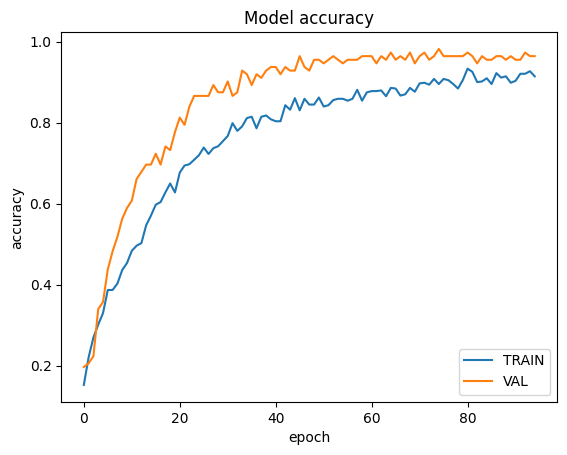

In [8]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

Confusion matrix, without normalization

Classification Report:
                 precision    recall  f1-score   support

  ForrestGump
       1.00      1.00      1.00        13
   ForwardRun
       1.00      1.00      1.00        23
      GirlRun
       0.83      1.00      0.90        19
       Naruto
       1.00      1.00      1.00        28
    NormalRun
       1.00      0.87      0.93        45
  ShoulderRun
       0.91      0.95      0.93        21
   SitWithRun
       0.93      1.00      0.96        25
UnswingingArm
       0.97      0.95      0.96        37

      accuracy                           0.96       211
     macro avg       0.95      0.97      0.96       211
  weighted avg       0.96      0.96      0.96       211

[[13  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0]
 [ 0  0  4  0 39  0  2  0]
 [ 0  0  0  0  0 20  0  1]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  2  0 35]]


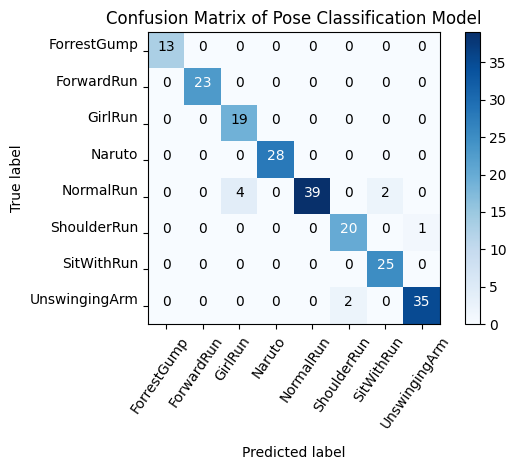

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_label = [class_names[i] for i in np.argmax(y_pred, axis=1)]
y_true_label = [class_names[i] for i in np.argmax(y_test, axis=1)]

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plot_confusion_matrix(cm, class_names, title ='Confusion Matrix of Pose Classification Model')

print('\nClassification Report:\n', classification_report(y_true_label, y_pred_label))
print(cm)

In [10]:
classifier.save_model("./model/", "run_classifier")

INFO:tensorflow:Assets written to: C:\Users\17214\AppData\Local\Temp\tmpeidsq8k9\assets


INFO:tensorflow:Assets written to: C:\Users\17214\AppData\Local\Temp\tmpeidsq8k9\assets


Model size: 27KB


# Predict 部分

In [11]:
classifier = MoveNetClassifier()
classifier.build_model(model_path="./model/run_classifier")

### pic_predict 部分

In [12]:
images_folder = os.path.join("./data/run_predict", 'running_pic')
csvs_path = tempfile.mkdtemp() + "/predict.csv"
_, predict_pose = poseMark.img_predict(folder=images_folder, csvs_path=csvs_path)

filename, data_value, _ = split_pose_landmarks(predict_pose)

y_pred = classifier.predict(data_value)
y_pred_label = [class_names[i].rstrip() for i in np.argmax(y_pred, axis=1)]

Preprocessing pic_predict
100%|██████████| 146/146 [00:10<00:00, 13.36it/s]


4/4 [==============================] - 0s 2ms/step


In [13]:
for f, p in zip(filename, y_pred_label):
  print(f"{f} is {p}")

ForrestGump_0.jpg is ForrestGump
ForrestGump_1.jpg is ForrestGump
ForrestGump_10.jpg is ForrestGump
ForrestGump_11.jpg is ForrestGump
ForrestGump_4.jpg is ForrestGump
ForrestGump_5.jpg is ForrestGump
ForrestGump_6.jpg is ForrestGump
ForrestGump_7.jpg is ForrestGump
ForrestGump_8.jpg is ForrestGump
ForwardRun_0.jpg is ForwardRun
ForwardRun_1.jpg is ForwardRun
ForwardRun_12.jpg is ForwardRun
ForwardRun_13.jpg is ForwardRun
ForwardRun_14.jpg is ForwardRun
ForwardRun_15.jpg is ForwardRun
ForwardRun_2.jpg is ForwardRun
ForwardRun_4.jpg is ForwardRun
ForwardRun_5.jpg is ForwardRun
ForwardRun_6.jpg is ForwardRun
ForwardRun_7.jpg is ForwardRun
ForwardRun_8.jpg is ForwardRun
GirlRun_0.jpg is GirlRun
GirlRun_1.jpg is GirlRun
GirlRun_10.jpg is GirlRun
GirlRun_12.jpg is GirlRun
GirlRun_2.jpg is GirlRun
GirlRun_3.jpg is GirlRun
GirlRun_4.jpg is GirlRun
GirlRun_6.jpg is GirlRun
GirlRun_7.jpg is GirlRun
GirlRun_8.jpg is GirlRun
GirlRun_9.jpg is GirlRun
Naruto_10.jpg is Naruto
Naruto_12.jpg is Naruto


### vid_predict 部分

In [14]:
video_folder = os.path.join("./data/run_predict", 'running_vid')
csvs_path = tempfile.mkdtemp() + "/predict.csv"
filename, y_pred = os.listdir(video_folder), []
for name in filename:
    _, predict_pose = poseMark.vid_predict(vid_path=f"{video_folder}/{name}", csvs_path=csvs_path)
    _, data_value, _ = split_pose_landmarks(predict_pose)
    pred = classifier.predict(data_value)
    label = [class_names[i].rstrip() for i in np.argmax(pred, axis=1)]
    y_pred.append(max(set(label), key=label.count))

Preprocessing vid_predict
100%|██████████| 27/27 [00:01<00:00, 14.07it/s]

1/1 [==============================] - 0s 20ms/step



Preprocessing vid_predict
100%|██████████| 6/6 [00:00<00:00, 14.39it/s]


1/1 [==============================] - 0s 21ms/step


Preprocessing vid_predict
100%|██████████| 6/6 [00:00<00:00, 14.41it/s]


1/1 [==============================] - 0s 19ms/step


Preprocessing vid_predict
100%|██████████| 5/5 [00:00<00:00, 14.27it/s]

1/1 [==============================] - 0s 18ms/step



Preprocessing vid_predict
100%|██████████| 5/5 [00:00<00:00, 13.69it/s]

1/1 [==============================] - 0s 18ms/step



Preprocessing vid_predict
100%|██████████| 6/6 [00:00<00:00, 14.38it/s]


1/1 [==============================] - 0s 18ms/step


Preprocessing vid_predict
100%|██████████| 18/18 [00:01<00:00, 14.24it/s]


1/1 [==============================] - 0s 22ms/step


In [15]:
for f, p in zip(filename, y_pred):
  print(f"{f} is {p}")

ForwardRun_0.mp4 is ForwardRun
ForwardRun_1.mp4 is ForwardRun
NormalRun_0.mp4 is GirlRun
NormalRun_1.mp4 is ForrestGump
NormalRun_2.mp4 is ForrestGump
NormalRun_3.mp4 is GirlRun
NormalRun_4.mp4 is ForrestGump
